# Data Extraction
- The legacy dataset contains entertainment licenses issued by the Office of Consumer Affairs and Licensing from November 2014 through Februrary 2015, which are designed to ensure public events such as live music, dancing by patrons, performers, arcades, or jukeboxes do not violate any laws and cause disruptions. It reveals licenses'number, date and time, status, category and primary applicant, doing business location, doing business name, fees, neighborhood, total capacity, capacity, units'number for use, units' type, which are used for analysis and answer for questions: Does government have any preference or trend of issuing entertainment licenses? Is there any suggestion for visitors? What is the strategy for ambitious companies to save cost?


In [27]:
# Prepare the packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.formula.api as smf
import os

In [28]:
os.getcwd()
os.chdir('/Users/apple/Desktop')
os.getcwd()

'/Users/apple/Desktop'

In [29]:
# Import the dataset.
Data_url = 'https://data.boston.gov/dataset/0d93d762-da11-4cea-9bf0-77aaa5d25c36/resource/7920c501-b410-4a9c-85ab-51338c9b34af/download/entertainment-licenses.csv'
DF = pd.read_csv(Data_url)
DF.head()

,LICENSENO,LICENSEDTTM,ISSDTTM,EXPDTTM,LICSTATUS,LICCATDESC,PRIMAPPLICANT,CONTACT,DBANAME,BUSINESSNAME,...,CAL_UNITTYPECODE,UnitTypeDescript,TotalEntCapacity,STNO,STNOHI,Address,CITY,STATE,ZIP,Location
0,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,WidescrnTV,Widescreen Television,70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"
1,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,Radio,Radio,70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"
2,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,CassetteCD,Cassette/CD Player,70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"
3,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,TV,"Television (under 27"")",70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"
4,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,DVDVCR,DVD/VCR,70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"


# Data Cleanup
- At the beginning of exploration, I cleaned up the dataset based on the need of story telling and removed some unnecessary or ambiguous columns like ISSDTTM, EXPDTTM, CONTACT, Manager, ENDTIME, CAL_POLICEDISTRICTCODE, UnitTypeDescript, TotalEntCapacity, and the address information associated with issued licenses. Next, I checked out if there exists any missing, zero value or columns that should be replaced or transformed and generated a new column named 'CAPACITYRESULT' to indicate the successful rate of licenses application. 

In [30]:
# Drop the unnecessary columns.
MyDF = DF[['LICENSENO','LICENSEDTTM','LICCATDESC','PRIMAPPLICANT','DBANAME','BUSINESSNAME','TOTALCAPACITY','CAPACITY','FEEAMOUNT','NUMBEROFUNITS','CAL_UNITTYPECODE','Neighborhood']]
MyDF.head(10)

,LICENSENO,LICENSEDTTM,LICCATDESC,PRIMAPPLICANT,DBANAME,BUSINESSNAME,TOTALCAPACITY,CAPACITY,FEEAMOUNT,NUMBEROFUNITS,CAL_UNITTYPECODE,Neighborhood
0,CAL-132180,1/1/2014 0:00,Non-Live Entertainment,Stephen Pole,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",70,70,180.0,1,WidescrnTV,South Boston
1,CAL-132180,1/1/2014 0:00,Non-Live Entertainment,Stephen Pole,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",70,0,0.0,1,Radio,South Boston
2,CAL-132180,1/1/2014 0:00,Non-Live Entertainment,Stephen Pole,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",70,0,0.0,1,CassetteCD,South Boston
3,CAL-132180,1/1/2014 0:00,Non-Live Entertainment,Stephen Pole,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",70,0,0.0,2,TV,South Boston
4,CAL-132180,1/1/2014 0:00,Non-Live Entertainment,Stephen Pole,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",70,0,180.0,1,DVDVCR,South Boston
5,CAL-132181,1/1/2014 0:00,Non-Live Entertainment,amrik pabla,Bukhara,"Manraj, Inc",60,60,0.0,1,CassetteCD,Jamaica Plain
6,CAL-132181,1/1/2014 0:00,Non-Live Entertainment,amrik pabla,Bukhara,"Manraj, Inc",60,0,0.0,1,WidescrnTV,Jamaica Plain
7,CAL-132182,1/1/2014 0:00,Non-Live Entertainment,Shane Sykes,Starbucks Coffee #22566,Starbucks Corporation,40,40,0.0,1,Radio,South Boston
8,CAL-132183,1/1/2014 0:00,Non-Live Entertainment,REMON KARIAN,Fiorella's Express,"Fiorella's Express, LLC",16,16,0.0,1,CassetteCD,Allston/Brighton
9,CAL-132183,1/1/2014 0:00,Non-Live Entertainment,REMON KARIAN,Fiorella's Express,"Fiorella's Express, LLC",16,0,0.0,1,WidescrnTV,Allston/Brighton


In [31]:
# Check out if there is any missing value.
from Pu_Liu_Module import function_check
print(function_check(MyDF))

LICENSENO           0
LICENSEDTTM         8
LICCATDESC          0
PRIMAPPLICANT       0
DBANAME             0
BUSINESSNAME        2
TOTALCAPACITY       0
CAPACITY            0
FEEAMOUNT           1
NUMBEROFUNITS       0
CAL_UNITTYPECODE    1
Neighborhood        0
dtype: int64


In [24]:
# Remove the missing values.
MyDF_clean = MyDF.dropna()
from Pu_Liu_Module import function_check
print(function_check(MyDF_clean))

LICENSENO           0
LICENSEDTTM         0
LICCATDESC          0
PRIMAPPLICANT       0
DBANAME             0
BUSINESSNAME        0
TOTALCAPACITY       0
CAPACITY            0
FEEAMOUNT           0
NUMBEROFUNITS       0
CAL_UNITTYPECODE    0
Neighborhood        0
dtype: int64


In [25]:
# Create a new variable named 'CAPACITYRESULT' and drop the unnecessary values. 
MyDF_clean = MyDF_clean.assign(CAPACITYRESULT = MyDF_clean['CAPACITY']/ MyDF_clean['TOTALCAPACITY'])


In [26]:
MyDF_clean = MyDF_clean.drop(['TOTALCAPACITY', 'CAPACITY'], axis = 1)

In [27]:
MyDF_clean = MyDF_clean[['LICENSENO','LICENSEDTTM','LICCATDESC','PRIMAPPLICANT','DBANAME','BUSINESSNAME','CAPACITYRESULT','FEEAMOUNT','NUMBEROFUNITS','CAL_UNITTYPECODE','Neighborhood']]
DD = MyDF_clean[(MyDF_clean['CAPACITYRESULT'] > 0) & (MyDF_clean['CAPACITYRESULT'] < 1) ].index
MyDF_clean.drop(DD , inplace=True)
MyDF_clean_L = MyDF_clean
MyDF_clean_L
MyDF_clean_L.to_csv("MyDF_clean_L.csv")

# Data Visualization 
- Secondly, it is time to discover important trends or preferences with explanatory data analysis.I plot the bar chart of various licenses which indicates that Non-Live Entertainment has more quotas available than others, and the passing rate of it is still sticking on the top while the average application fee is the lowest, meaning that the Office of Consumer Affairs and Licensing prefers to issue the Non-Live Entertainment rather than to issue others. The reason behind this phenomenon is probably related to the consideration of social security,cost of police departments and noise pollution,leading to the government needs to charge a high fee on the licenses of night club, live entertainment to guarantee the activities. 


In [330]:
# Divide licenses into three categories.
MyDF_clean['LICCATDESC'].value_counts()


Non-Live Entertainment    2489
Night Club                1536
Live Entertainment        1157
Name: LICCATDESC, dtype: int64

Text(0.5, 1.0, 'The passing rate of Non-live Entertainment licenses is more than any other one')

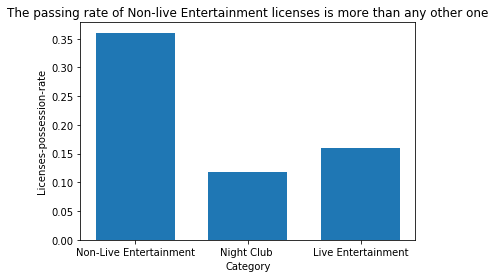

In [331]:
# Plot the passing rate of various licenses
Licenses_possession_rate = [Nol_ent['CAPACITYRESULT'].sum()/2502,Nc['CAPACITYRESULT'].sum()/1541,L_ent['CAPACITYRESULT'].sum()/1169]
plt.bar(Category,Licenses_possession_rate,0.7)
plt.xlabel('Category')
plt.ylabel('Licenses-possession-rate')
plt.title('The passing rate of Non-live Entertainment licenses is more than any other one')

In [332]:
# Select the successful processed licenses.
MyDF_clean = MyDF_clean[MyDF_clean['CAPACITYRESULT'] == 1]
MyDF_clean['LICCATDESC'].value_counts()

Non-Live Entertainment    902
Live Entertainment        186
Night Club                181
Name: LICCATDESC, dtype: int64

Text(0.5, 1.0, 'Non-Live Entertainment possesses the most licenses')

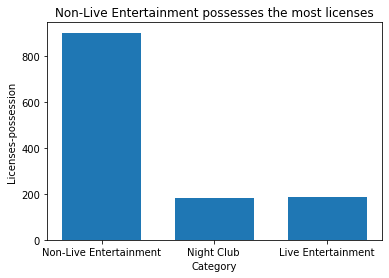

In [333]:
# Plot Licenses'possession of Non-Live Entertainment, Night Club, and Live Entertainment.
Nol_ent = MyDF_clean[MyDF_clean['LICCATDESC'] == 'Non-Live Entertainment']
Nol_ent['CAPACITYRESULT'].sum()
Nc = MyDF_clean[MyDF_clean['LICCATDESC'] == 'Night Club']
Nc['CAPACITYRESULT'].sum()
L_ent = MyDF_clean[MyDF_clean['LICCATDESC'] == 'Live Entertainment']
L_ent['CAPACITYRESULT'].sum()
Category = ['Non-Live Entertainment','Night Club ','Live Entertainment']
Licenses_possession = [Nol_ent['CAPACITYRESULT'].sum(),Nc['CAPACITYRESULT'].sum(),L_ent['CAPACITYRESULT'].sum()]
plt.bar(Category,Licenses_possession,0.7)
plt.xlabel('Category')
plt.ylabel('Licenses-possession')
plt.title('Non-Live Entertainment possesses the most licenses')

Text(0.5, 1.0, 'The cost of application on Non-Live Entertainment is the lowest')

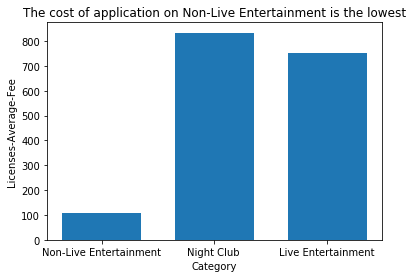

In [334]:
# Plot the Average application fee of licenses.
Avgfee_Nol_ent = (Nol_ent['FEEAMOUNT'].sum())/902
Avgfee_Nc = (Nc['FEEAMOUNT'].sum())/186
Avgfee_L_ent = (L_ent['FEEAMOUNT'].sum())/181
Licenses_Avg_fee = [Avgfee_Nol_ent,Avgfee_Nc,Avgfee_L_ent]
plt.bar(Category,Licenses_Avg_fee,0.7)
plt.xlabel('Category')
plt.ylabel('Licenses-Average-Fee')
plt.title('The cost of application on Non-Live Entertainment is the lowest')

# Descriptive Analysis
- Thirdly, I move on to perform exploratory data analysis with statistical techniques.I summarize the dataset and it is not hard to find that most of the licenses issued to Downtown/Charlestown/North End and most of them are CassetteCD. Next, I classify the licenses based on Neighborhood and summarize the main activity separately, indicating different attributes on areas. Downtown/Charlestown/North End, Back Bay/South End, Allston/Brighton are the best places for visitors who prefer silent, Non-Live entertainment and listen to music. Visitors who want more violent, Night Club entertainment at night and enroll into DancingPat, crazy Radio can go to the Downtown/Charlestown/North End, Back Bay/South End, and South Boston. For those who want to participate in Live entertainment and enjoy amazing vocal,songs, Downtown/Charlestown/North End, Back Bay/South End, South Boston are the best choices.

In [395]:
# Summary the dataset. 
MyDF_clean.describe(include='all')

,LICENSENO,LICENSEDTTM,LICCATDESC,PRIMAPPLICANT,DBANAME,BUSINESSNAME,CAPACITYRESULT,FEEAMOUNT,NUMBEROFUNITS,CAL_UNITTYPECODE,Neighborhood
count,1269,1269,1269,1269,1269,1269,1269.0,1269.000000,1269.000000,1269,1269
unique,1269,91,3,1101,1185,1157,NaN,NaN,NaN,18,11
top,CAL-132232,1/1/2014 0:00,Non-Live Entertainment,Mary Her,Boloco,Starbucks Corporation,NaN,NaN,NaN,CassetteCD,Downtown/Charlestown/North End
freq,1,1172,902,18,11,19,NaN,NaN,NaN,488,448
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.0,304.960599,52.181245,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,617.369029,934.136398,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.0,400.000000,1.000000,NaN,NaN


In [336]:
# Classify Non-Live licenses based on Neighborhood.
Nol_ent['Neighborhood'].value_counts()

Downtown/Charlestown/North End    293
Back Bay/South End                224
Allston/Brighton                  103
East Boston                        91
South Boston                       64
West Roxbury/Roslindale            33
Jamaica Plain                      27
Dorchester                         24
Roxbury/Dorchester                 19
Mattapan/Dorchester                12
Hyde Park                          12
Name: Neighborhood, dtype: int64

In [337]:
# Summarize the main activity related to Non-Live entertainment licenses. 
from Pu_Liu_Module import function_summary
DCN_1 = Nol_ent.loc[Nol_ent['Neighborhood']=='Downtown/Charlestown/North End', 'CAL_UNITTYPECODE']
DCN_2 = Nol_ent.loc[Nol_ent['Neighborhood']=='Back Bay/South End', 'CAL_UNITTYPECODE']
DCN_3 = Nol_ent.loc[Nol_ent['Neighborhood']=='Allston/Brighton', 'CAL_UNITTYPECODE']
function_summary(DCN_1,DCN_2,DCN_3)

(count            293
 unique            10
 top       CassetteCD
 freq             148
 Name: CAL_UNITTYPECODE, dtype: object, count            224
 unique             9
 top       CassetteCD
 freq             117
 Name: CAL_UNITTYPECODE, dtype: object, count            103
 unique             7
 top       CassetteCD
 freq              37
 Name: CAL_UNITTYPECODE, dtype: object)

In [338]:
# Classify Night Club licenses based on Neighborhood.
Nc['Neighborhood'].value_counts()

Downtown/Charlestown/North End    86
Back Bay/South End                30
South Boston                      17
Allston/Brighton                  16
Dorchester                         8
East Boston                        8
Roxbury/Dorchester                 4
Jamaica Plain                      4
West Roxbury/Roslindale            3
Hyde Park                          3
Mattapan/Dorchester                2
Name: Neighborhood, dtype: int64

In [339]:
# Summarize the main activity related to Night Club licenses.
from Pu_Liu_Module import function_summary
Nc_1 = Nc.loc[Nc['Neighborhood']=='Downtown/Charlestown/North End', 'CAL_UNITTYPECODE']
Nc_2 = Nc.loc[Nc['Neighborhood']=='Back Bay/South End', 'CAL_UNITTYPECODE']
Nc_3 = Nc.loc[Nc['Neighborhood']=='South Boston', 'CAL_UNITTYPECODE']
function_summary(Nc_1,Nc_2,Nc_3)

(count        86
 unique       11
 top       Radio
 freq         20
 Name: CAL_UNITTYPECODE, dtype: object, count             30
 unique             9
 top       DancingPat
 freq              10
 Name: CAL_UNITTYPECODE, dtype: object, count             17
 unique             7
 top       DancingPat
 freq               4
 Name: CAL_UNITTYPECODE, dtype: object)

In [340]:
# Classify Live-Entertainment licenses based on Neighborhood.
L_ent ['Neighborhood'].value_counts()

Downtown/Charlestown/North End    69
Back Bay/South End                38
South Boston                      21
Allston/Brighton                  16
Dorchester                        12
Jamaica Plain                     10
Roxbury/Dorchester                 6
East Boston                        5
West Roxbury/Roslindale            5
Hyde Park                          3
Mattapan/Dorchester                1
Name: Neighborhood, dtype: int64

In [399]:
# Summarize the main activity related to Live-Entertainment licenses.
from Pu_Liu_Module import function_summary
L_ent_1 = L_ent.loc[L_ent['Neighborhood']=='Downtown/Charlestown/North End', 'CAL_UNITTYPECODE']
L_ent_2 = L_ent.loc[L_ent['Neighborhood']=='Back Bay/South End', 'CAL_UNITTYPECODE']
L_ent_3 = L_ent.loc[L_ent['Neighborhood']=='South Boston', 'CAL_UNITTYPECODE']
function_summary(L_ent_1,L_ent_2,L_ent_3)

(count             69
 unique            11
 top       CassetteCD
 freq              24
 Name: CAL_UNITTYPECODE, dtype: object, count            38
 unique           11
 top       InstVocal
 freq             10
 Name: CAL_UNITTYPECODE, dtype: object, count             21
 unique             8
 top       CassetteCD
 freq               7
 Name: CAL_UNITTYPECODE, dtype: object)

# Predictive Analytics
- Finally, I try to establish a linear model to predict the application fee of licenses depending on the number of units that business want to apply for and it turns out that ambitious companies would have to pay more money for the application fee in the future if they decide to purchase the licenses for more equipments, facilities and extend their business. Therefore, companies that want to save their budget should figure out another way to provide conditions for various activities. For example, assigning a part of their business to the internet or online rather than gather people in crowd.

In [392]:
# Build the linear regression.
MyDF_clean_L
results_1 = smf.ols('FEEAMOUNT ~ NUMBEROFUNITS', data = MyDF_clean_L).fit()
print(results_1.params)
results_1.summary()

Intercept        172.893774
NUMBEROFUNITS      0.049364
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FEEAMOUNT   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     12.20
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           0.000482
Time:                        16:50:11   Log-Likelihood:                -43078.
No. Observations:                5182   AIC:                         8.616e+04
Df Residuals:                    5180   BIC:                         8.617e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       172.8938     13.734     12.589      0.000     145.969     199.819
NUMBEROFUNITS     0.0494      0.014      3.493      0.000       0.022       0.077
==============================================================================
Omnibus:                    13932.172   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        416603067.505
Skew:                          32.381   Prob(JB):                         0.00
Kurtosis:                    1390.540   Cond. No.                         974.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Trend of Fee with Number of units')

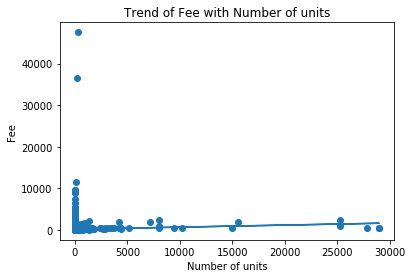

In [394]:
# Plot the linear regression.
plt.scatter(MyDF_clean_L.NUMBEROFUNITS, MyDF_clean_L.FEEAMOUNT)
plt.plot(MyDF_clean_L.NUMBEROFUNITS, results_1.fittedvalues)
plt.xlabel('Number of units')
plt.ylabel('Fee')
plt.title('Trend of Fee with Number of units')